# Spacetime


author: steeve.laquitaine@epfl.ch  
date: 2023.10.13  

Purpose: describe multi-channel spatio-temporal dynamics of action potentials, in vivo.


Calibration for preprint's figure:

* A 32-site column of 31 * 22.5 microns (inter-site distance) = 697.5 microns plotted as 2.3 inches (on figure)
* We plot the horvath traces on the same scale as the neuropixels multi-sites traces: 1960 microns plotted as 2.3 inches -> 697.5 plotted as 0.81 inches.

* We plot the horvath traces on the same scale as the neuropixels multi-sites traces: 1960 microns plotted as 2.3 inches -> 697.5 plotted as 0.81 inches.

* We can plot 26 (probe 1) + 31 (probe 2) + 19 (probe 3) = 76 sites covering 1687.5 microns (25 * 22.5) + (30 * 22.5) + (18 * 22.5). 
* probe 1 (L1 and 2/3): 25 * 22.5 microns -> 0.66 inches on figure
* probe 2 (L4 and 5): 30 * 22.5 microns -> 0.79 inches on figure
* probe 3 (L6): 18 * 22.5 microns = 382.5 microns -> 0.48 inches on figure

## Setup

create and activate env from `spikinterf.txt`

In [552]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# probe 1 (layer 1 and 2/3)
data_conf, param_conf_sili = get_config(
    "silico_horvath", "concatenated/probe_1"
).values()
PRE_PATH_1 = data_conf["preprocessing"]["output"]["trace_file_path"]

# probe 2
data_conf, param_conf_sili = get_config(
    "silico_horvath", "concatenated/probe_2"
).values()
PRE_PATH_2 = data_conf["preprocessing"]["output"]["trace_file_path"]

# probe 3
data_conf, param_conf_sili = get_config(
    "silico_horvath", "concatenated/probe_3"
).values()
PRE_PATH_3 = data_conf["preprocessing"]["output"]["trace_file_path"]


# FIGURE SETTINGS
# colors
COLOR_HS = np.array([26, 152, 80]) / 255 # green

LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-06-28 16:42:53,067 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-28 16:42:53,089 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-28 16:42:53,090 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-28 16:42:53,105 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-28 16:42:53,106 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-28 16:42:53,121 - root - utils.py - get_config - INFO - Reading experiment config. - done


## L1,2/3

### Load dataset

In [553]:
FIGSIZE = (1.05, 1.25)  # DO NOT CHANGE!! Calibrated for preprint figure

In [554]:
# get preprocessed
Recording = si.load_extractor(PRE_PATH_1)

# get layers
layers = Recording.get_property("layers")

# count site per column
site_per_col = int(len(layers) / 4)

# get layers layout
col1_site_out = np.where(layers[:site_per_col] == "Outside")[0]
col1_site_l1 = np.where(layers[:site_per_col] == "L1")[0]
col1_site_l2_3 = np.where((layers[:site_per_col] == "L2_3"))[0]
col1_site_l4 = np.where(layers[:site_per_col] == "L4")[0]
col1_site_l5 = np.where(layers[:site_per_col] == "L5")[0]
col1_site_l6 = np.where(layers[:site_per_col] == "L6")[0]

# print layers
print(np.unique(layers))

# check sites from layer 5
print(col1_site_l5)

['L1' 'L2_3' 'Outside']
[]


In [555]:
# plot
DURATION = 10  # 20  # in ms, 46
NUM = 1442  # 1430  # 1424  # 1415  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
LINEWIDTH = 0.15
LINEWIDTH_BORD = 0.25
PLOT_Y_PITCH = 100

n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)
Y_MAX = PLOT_Y_PITCH * (site_per_col - 1)

number of sites shown: 26


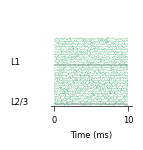

In [556]:
prep_traces = Recording.get_traces()
n_contacts = prep_traces.shape[1]

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0
for contact_i in np.arange(0, site_per_col, 1):
    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L2/3"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L1"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # in target layer
    if contact_i in col1_site_l1:
        c_site += 1
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

    if contact_i in col1_site_l2_3:
        c_site += 1
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

print("number of sites shown:", c_site)

# save figures
plt.savefig(
    "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l1_2_3.svg",
    **savefig_cfg
)

### plot

* 32 sites in a column

In [566]:
FIGSIZE = (1.05, 1.25)  # DO NOT CHANGE!! Calibrated for preprint figure

## L4 and 5

### Load dataset

In [567]:
# get preprocessed
Recording = si.load_extractor(PRE_PATH_2)

# get layers
layers = Recording.get_property("layers")

# count site per column
site_per_col = int(len(layers) / 4)

# get layers layout
col1_site_out = np.where(layers[:site_per_col] == "Outside")[0]
col1_site_l1 = np.where(layers[:site_per_col] == "L1")[0]
col1_site_l2_3 = np.where((layers[:site_per_col] == "L2_3"))[0]
col1_site_l4 = np.where(layers[:site_per_col] == "L4")[0]
col1_site_l5 = np.where(layers[:site_per_col] == "L5")[0]
col1_site_l6 = np.where(layers[:site_per_col] == "L6")[0]

# print layers
print(np.unique(layers))

['L2' 'L4' 'L5']


In [568]:
FIGSIZE = (1.05, 1.25)  # DO NOT CHANGE!! Calibrated for figure

number of sites shown: 31


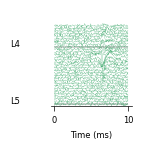

In [569]:
prep_traces = Recording.get_traces()
n_contacts = prep_traces.shape[1]

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0
for contact_i in np.arange(0, site_per_col, 1):
    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L4"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L5"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # in target layer
    if contact_i in col1_site_l4:
        c_site += 1
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

    if contact_i in col1_site_l5:
        c_site += 1
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

print("number of sites shown:", c_site)

# save figures
plt.savefig(
    "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l4_5.svg",
    **savefig_cfg
)

## L6

In [573]:
FIGSIZE = (1.05, 1.28)  # DO NOT CHANGE!! Calibrated for figure

In [574]:
# get preprocessed
Recording = si.load_extractor(PRE_PATH_3)

# get layers
layers = Recording.get_property("layers")

# count site per column
site_per_col = int(len(layers) / 4)

# get layers layout
col1_site_out = np.where(layers[:site_per_col] == "Outside")[0]
col1_site_l6 = np.where(layers[:site_per_col] == "L6")[0]

# print layers
print(np.unique(layers))

['L6' 'Outside']


number of sites shown: 19


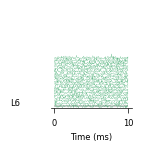

In [575]:
prep_traces = Recording.get_traces()
n_contacts = prep_traces.shape[1]

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0
for contact_i in np.arange(0, site_per_col, 1):
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L6"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # in target layer
    if contact_i in col1_site_l6:
        c_site += 1
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

print("number of sites shown:", c_site)

# save figures
plt.savefig(
    "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l6.svg",
    **savefig_cfg
)